In [1]:
import pandas as pd
from sklearn.model_selection import  train_test_split
import pickle
import xgboost

In [3]:
df = pd.read_csv("./data/titanic.csv")
df = df[["Pclass", "Sex", "Age", "SibSp", "Parch","Fare", "Cabin", "Embarked", "Survived"]]
df["Cabin"] = [x[0] if type(x) == str else "No Data" for x in df["Cabin"].values]
df.head()

Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked  Survived
0       3    male  22.0      1      0   7.2500  No Data        S         0
1       1  female  38.0      1      0  71.2833        C        C         1
2       3  female  26.0      0      0   7.9250  No Data        S         1
3       1  female  35.0      1      0  53.1000        C        S         1
4       3    male  35.0      0      0   8.0500  No Data        S         0

In [5]:
df = df.dropna().reset_index(drop=True)
df.head()

Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked  Survived
0       3    male  22.0      1      0   7.2500  No Data        S         0
1       1  female  38.0      1      0  71.2833        C        C         1
2       3  female  26.0      0      0   7.9250  No Data        S         1
3       1  female  35.0      1      0  53.1000        C        S         1
4       3    male  35.0      0      0   8.0500  No Data        S         0

In [6]:
from sklearn import preprocessing
for column in ["Sex", "Cabin", "Embarked"]:
    le = preprocessing.LabelEncoder()
    le.fit(df[column].values)
    df[column] = le.transform(df[column])

df.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked  Survived
0       3    1  22.0      1      0   7.2500      7         2         0
1       1    0  38.0      1      0  71.2833      2         0         1
2       3    0  26.0      0      0   7.9250      7         2         1
3       1    0  35.0      1      0  53.1000      2         2         1
4       3    1  35.0      0      0   8.0500      7         2         0

In [44]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_train, y_train)

In [46]:
obj = [model_xgb, df]
with open("./data/obj_v2", "wb") as obj_file:
    pickle.dump(obj, obj_file)


In [16]:
import lime
import lime.lime_tabular

In [41]:
t.values[0]

array([ 2.  ,  0.  , 33.  ,  1.  ,  2.  , 27.75,  7.  ,  2.  ,  1.  ])

In [39]:
list(X_test.columns)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [111]:
import lime
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=list(X_train.columns), class_names=["Survived", "Not Survived"], discretize_continuous=True)

TypeError: LimeTabularExplainer.__init__() got an unexpected keyword argument 'top_labels'

In [65]:
exp = explainer.explain_instance(X_test.values[2], model_xgb.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)


In [70]:
exp = explainer.explain_instance(X_test.values[0], model_xgb.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

In [71]:
from lime.submodular_pick import SubmodularPick

In [118]:
pick = SubmodularPick(explainer, X_test.values, model_xgb.predict_proba, num_exps_desired=10, sample_size=1000)

D:\AMI\venv\Lib\site-packages\lime\submodular_pick.py:57: UserWarning: Requested sample size larger than
                              size of input data. Using all data
  warnings.warn("""Requested sample size larger than


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

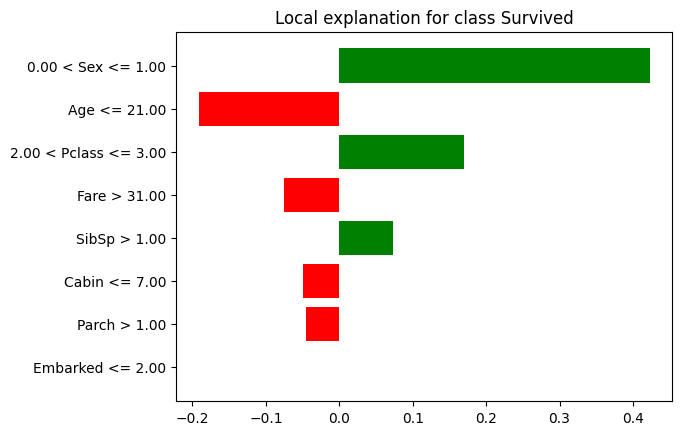

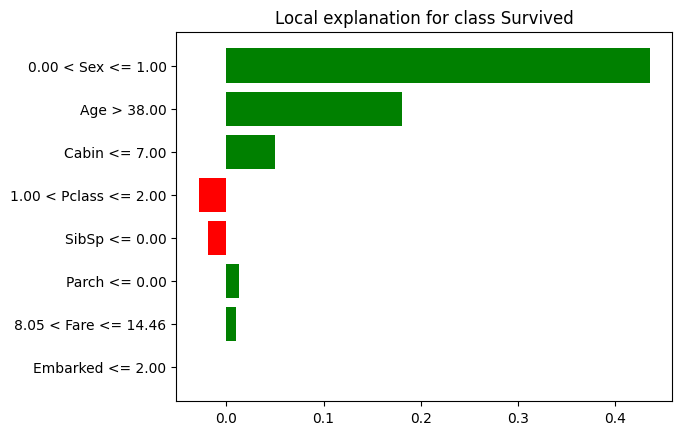

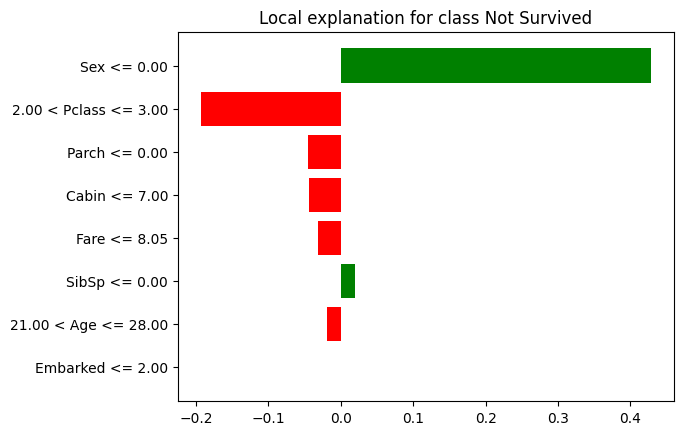

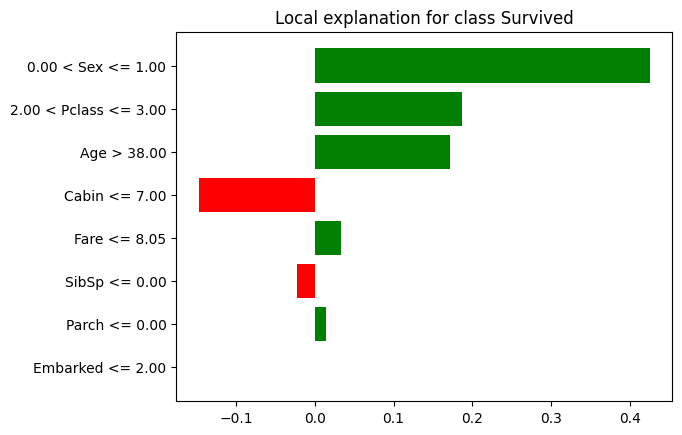

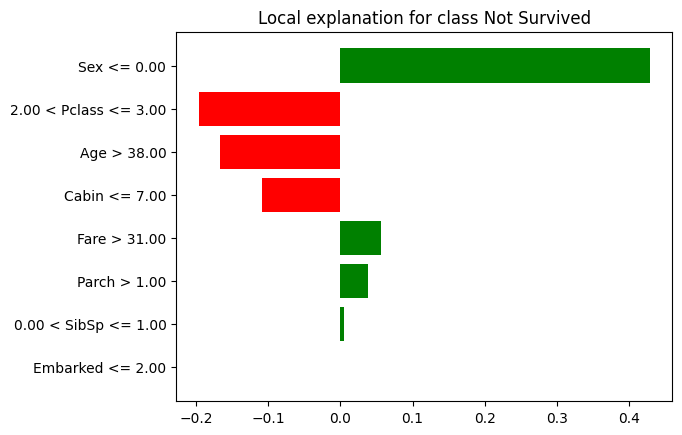

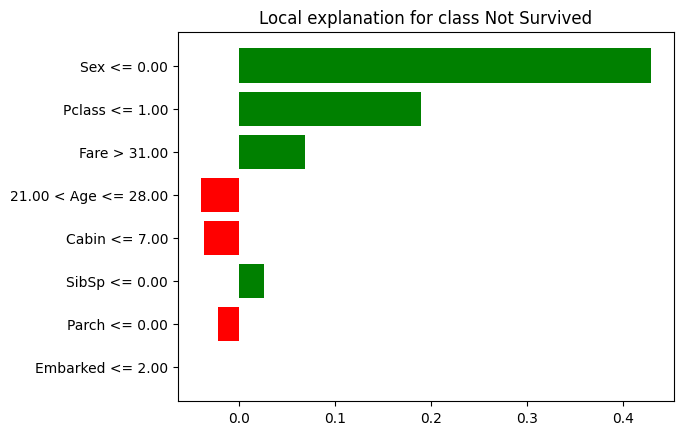

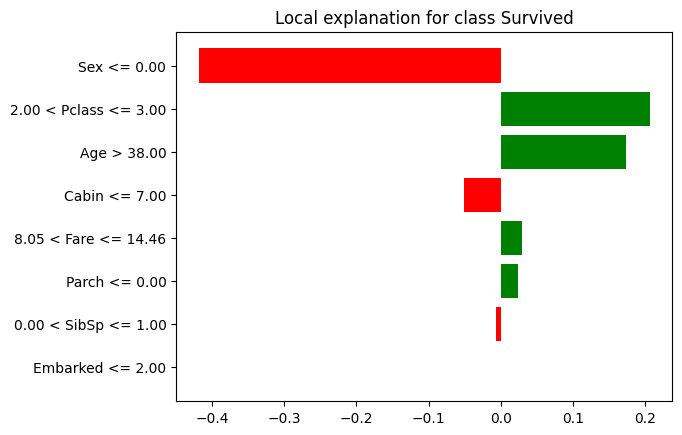

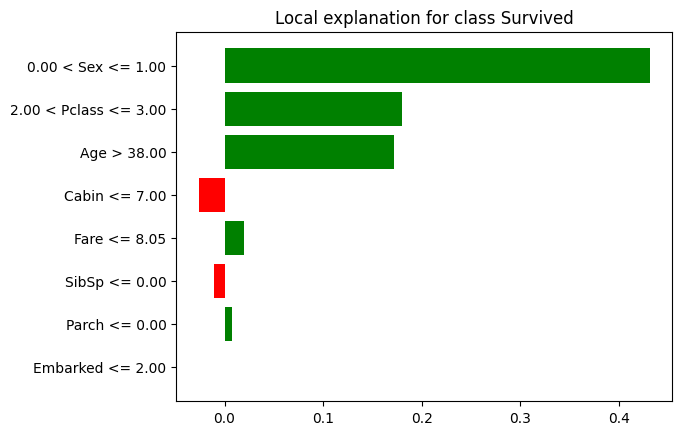

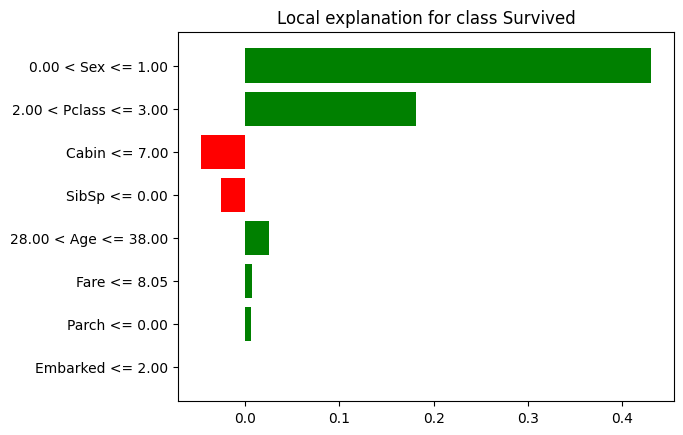

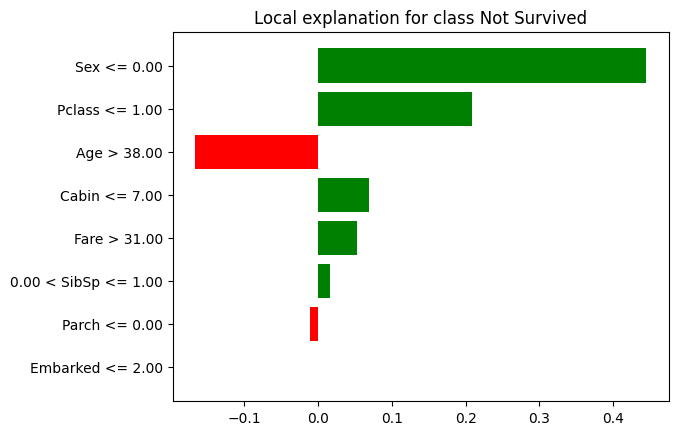

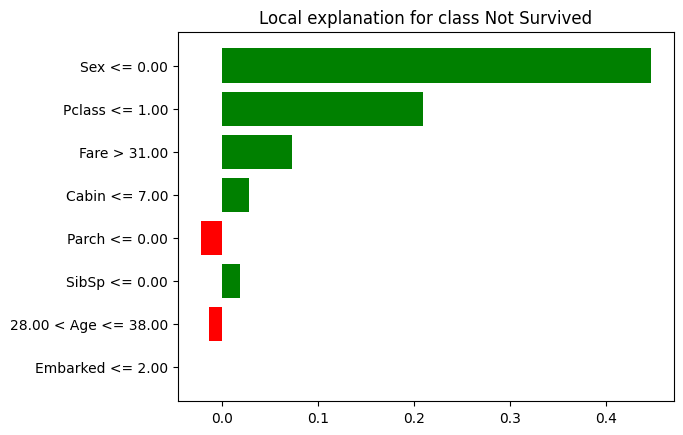

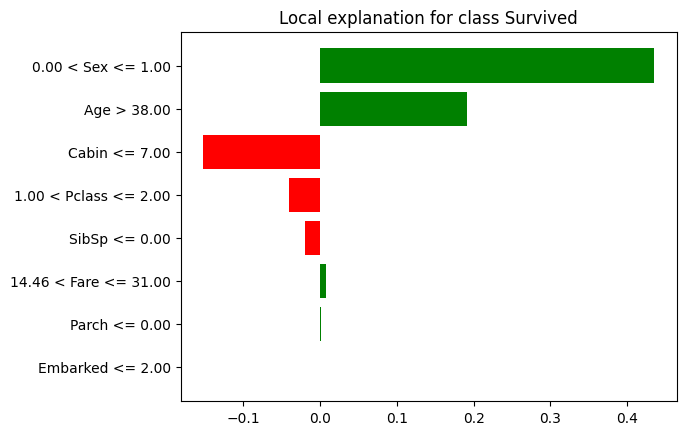

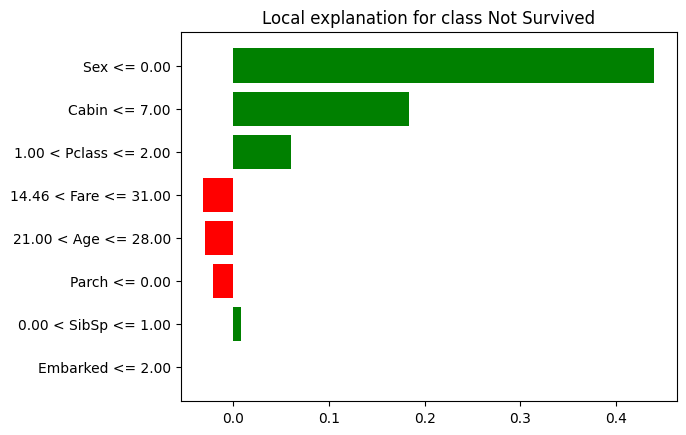

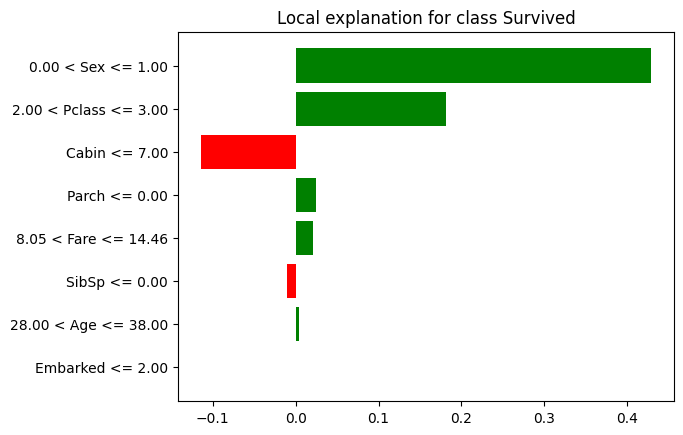

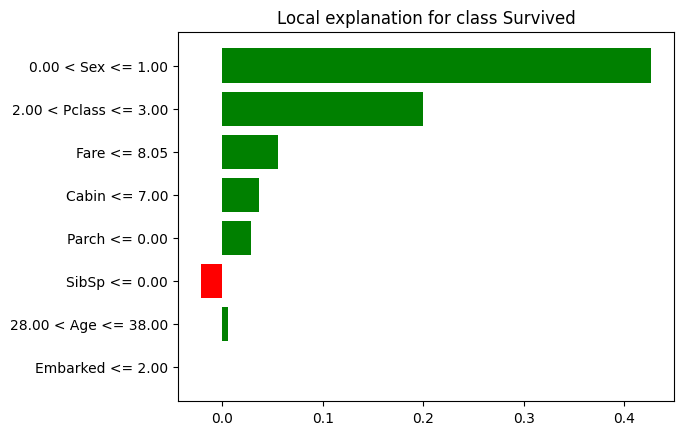

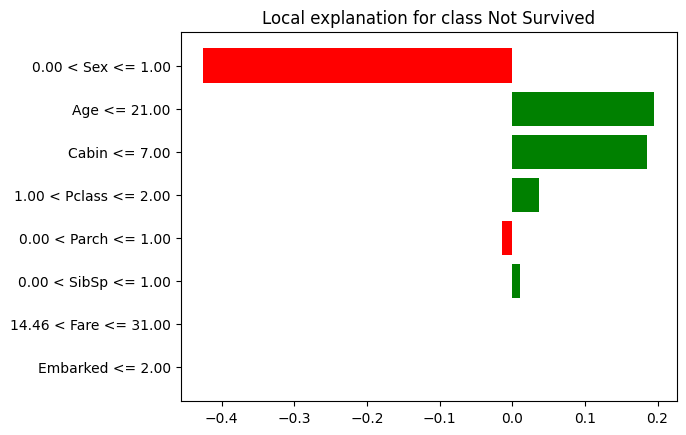

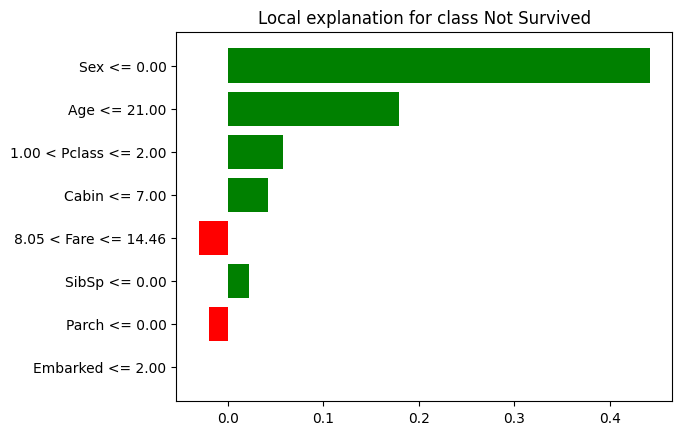

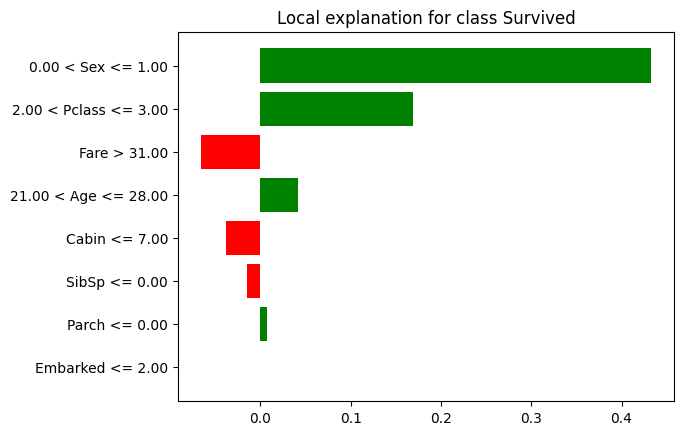

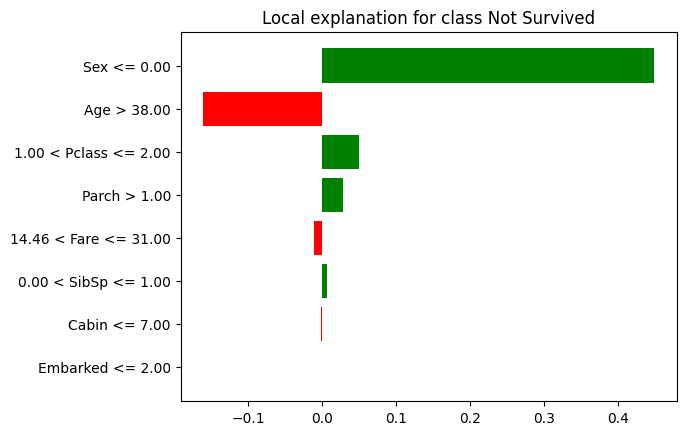

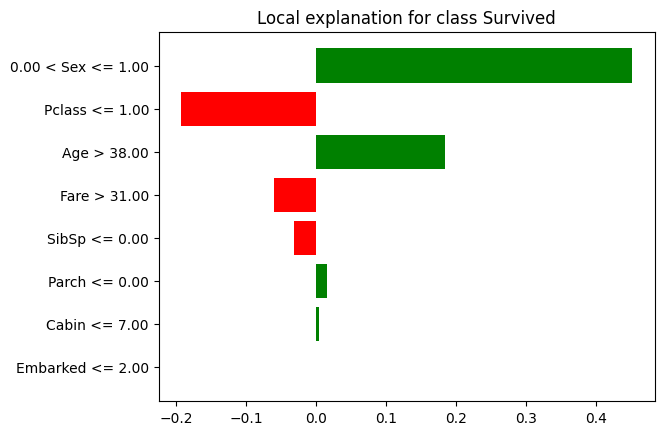

In [116]:
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in pick.explanations]

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

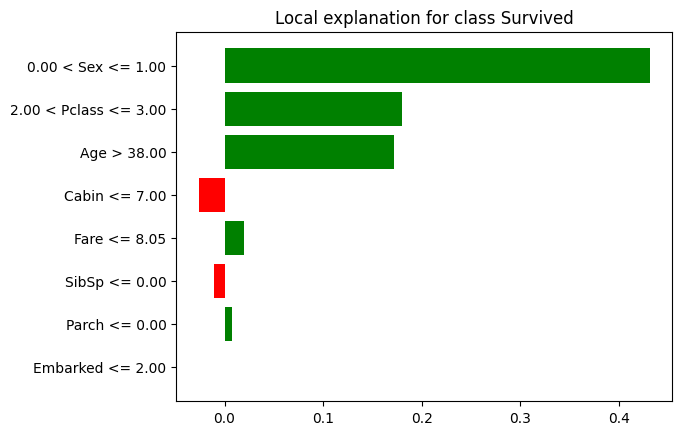

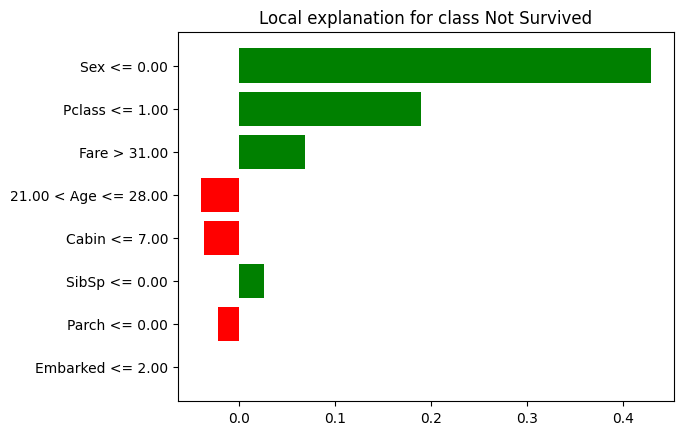

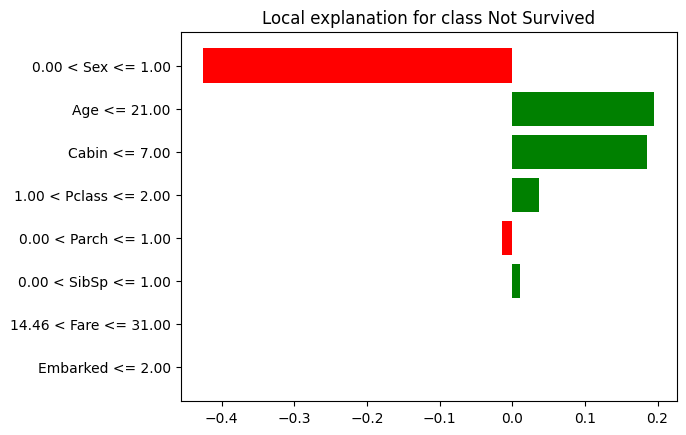

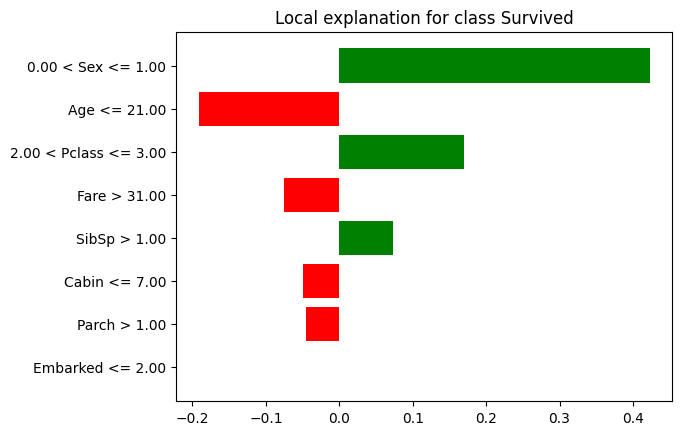

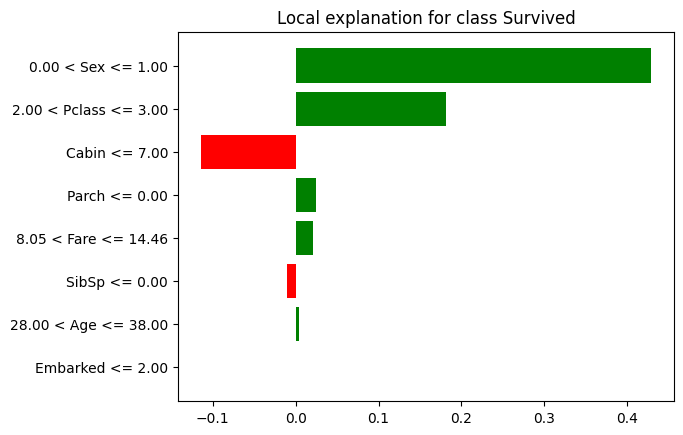

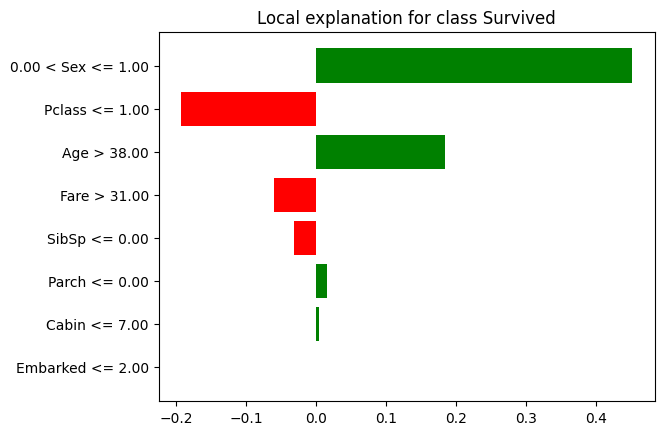

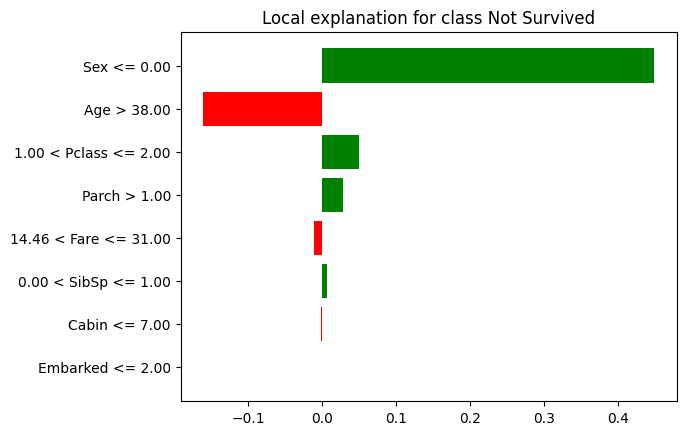

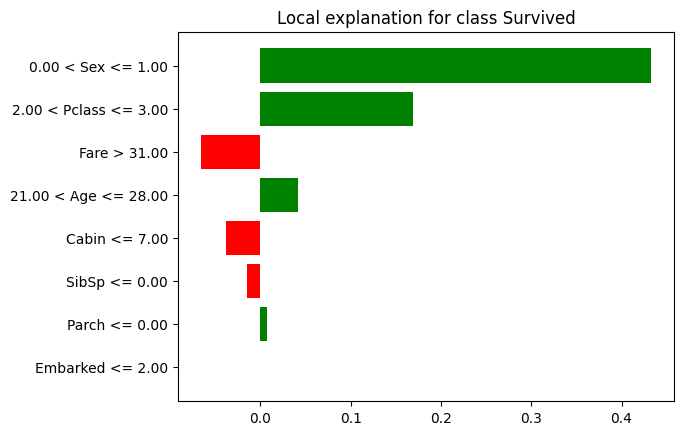

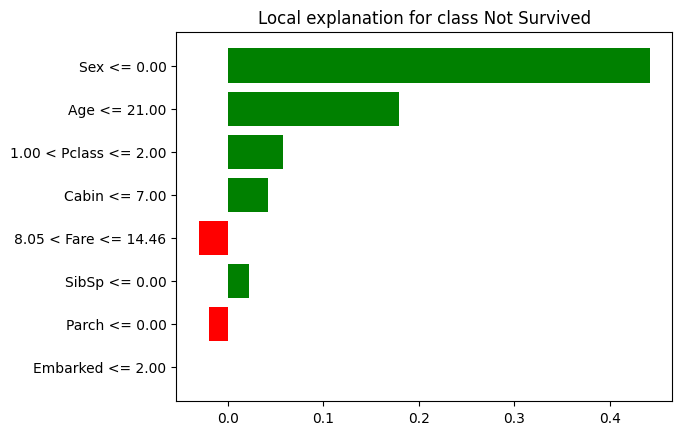

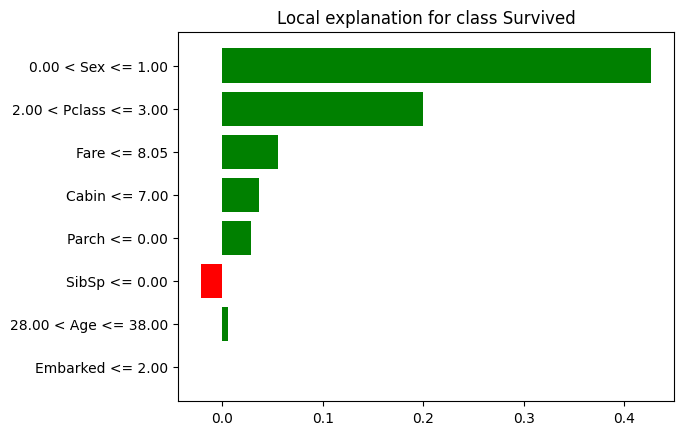

In [112]:
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in pick.sp_explanations]